In [2]:
#Build a simple liner regression model by perfroming EDA and do necessary transformations and select the best model
#1) Delivery_time -> Predict delivery time using sorting time 

In [3]:
#!pip install pandas_profiling
#!pip install sweetviz
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [4]:
data=pd.read_csv('D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/4_Simple Linear Regression/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Checking of datatypes

In [6]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### EDA and Data Visulalization

<AxesSubplot:>

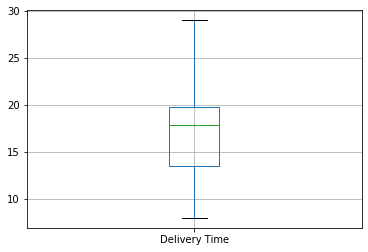

In [9]:
data.boxplot(column=['Delivery Time'])

## Checking for nulls and duplicate values

In [10]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
data[data.duplicated()].shape

(0, 2)

Text(0.5, 1.0, 'Sorting Time')

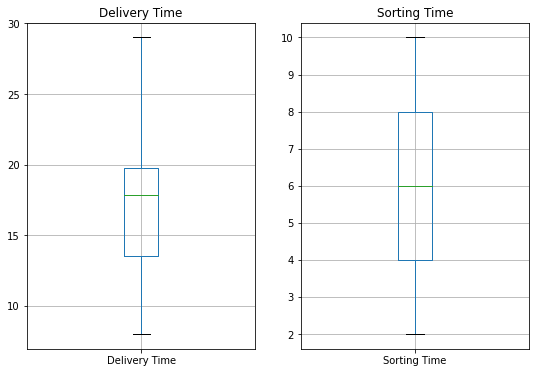

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
data.boxplot(column=['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
data.boxplot(column=['Sorting Time'])
plt.title('Sorting Time')

In [13]:
# No outliers, concluded from above box plot.

### Feature Engineering, Column Renaming

In [59]:
renamed_data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
renamed_data


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [60]:
renamed_data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
renamed_data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Correation Analysis

In [15]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


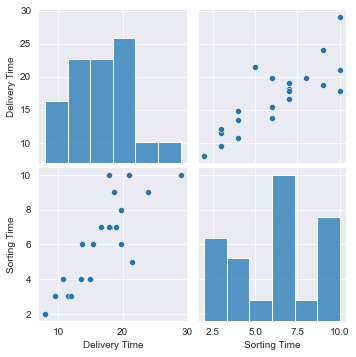

In [16]:
#Format the plot background and scatter plots for all the variables
# To check homoscedasticity and heteroscedasticity
sns.set_style(style='darkgrid')
sns.pairplot(data)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

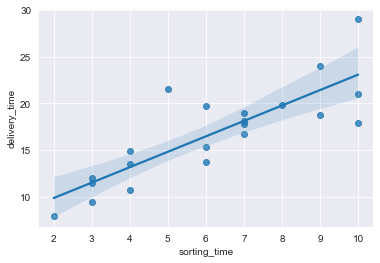

In [17]:
sns.regplot(x=renamed_data['sorting_time'],y=renamed_data['delivery_time'])

## Building the Model

In [18]:
testmodel = smf.ols('delivery_time~sorting_time',data=renamed_data).fit()

# Testing the Model

In [19]:
# Finding coefficient parameters
testmodel.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
# Finding tvalues and pvalues
testmodel.tvalues , testmodel.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [30]:
testmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        15:06:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
(testmodel.rsquared,testmodel.aic,testmodel.rsquared_adj)

(0.6822714748417231, 106.71400170798609, 0.6655489208860244)

# Transformation on data to get Rsquared and Rsquared adjust value nearer to 0.8.The model is said to be good fit if Rsquared and adjusted rsquared values are above 0.8

In [32]:
testmodel_sqroot = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)',data=renamed_data).fit()
testmodel_sqroot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 06 Dec 2022   Prob (F-statistic):           8.48e-07
Time:                            15:19:33   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
testmodel_cuberoot = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)',data=renamed_data).fit()
testmodel_cuberoot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 06 Dec 2022   Prob (F-statistic):           4.90e-07
Time:                            15:20:22   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
testmodel_log = smf.ols('np.log(delivery_time)~np.log(sorting_time)',data=renamed_data).fit()
testmodel_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 06 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                           15:20:56   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Validation by finding MSE(Mean Sqaure Error) and RMSE (Root mean square error) 

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
sqrroot_pred =np.square(testmodel_sqroot.predict(renamed_data['sorting_time']))
cuberoot_pred =pow(testmodel_cuberoot.predict(renamed_data['sorting_time']),3)
log_pred =np.exp(testmodel_log.predict(renamed_data['sorting_time']))


In [41]:
rmse_sqroot =np.sqrt(mean_squared_error(renamed_data['delivery_time'], sqrroot_pred))
rmse_cuberoot =np.sqrt(mean_squared_error(renamed_data['delivery_time'], cuberoot_pred))
rmse_log =np.sqrt(mean_squared_error(renamed_data['delivery_time'], log_pred))
print('model=', np.sqrt(testmodel.mse_resid),'\n' 'square_root_model=', rmse_sqroot,'\n' 'cube_root_model=', rmse_cuberoot,'\n' 'log_model=', rmse_log)


model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893575 
log_model= 2.7458288976145497


### It is observed that for LOG transform model, RMSE is less and Rsquared and Adjusted Rsqaured is High (nearer to 0.8).
### So, Log Transformation model will be used to predict the data.

# Predictions

### Prediction on newely added data

In [42]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [43]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [44]:
testmodel_log.predict(data_pred)

0    2.703662
1    2.984500
dtype: float64

### Predicting values from Model with Log Transfromation of Data 

In [52]:
predicted = pd.DataFrame()
predicted['sorting_time'] = renamed_data.sorting_time
predicted['delivery_time'] = renamed_data.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(testmodel_log.predict(predicted.sorting_time)))
predicted


,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [64]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = renamed_data.sorting_time
predicted1['delivery_time'] = renamed_data.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(testmodel.predict(predicted1.sorting_time))
predicted1


,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
